In [40]:
import tensorflow as tf
import keras
from keras.layers import Dense
from keras.models import Sequential
import pandas  as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [41]:
df = pd.read_csv('/content/House Sales in King County, USA.csv')

In [42]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [43]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [45]:
df.drop('id' , axis=1 , inplace=True)
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [46]:
df['date'] = pd.to_datetime(df['date'], format='%Y%m%dT000000')

unique = df['date'].dt.strftime('%Y%m%d').unique()
unique[:10]

array(['20141013', '20141209', '20150225', '20150218', '20140512',
       '20140627', '20150115', '20150415', '20150312', '20150403'],
      dtype=object)

In [47]:
df['date'] = df['date'].dt.strftime('%Y%m%d')
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,20141013,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,20141209,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,20150225,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,20141209,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,20150218,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [48]:
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df.drop(columns=['date'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21613 non-null  float64
 1   bedrooms       21613 non-null  int64  
 2   bathrooms      21613 non-null  float64
 3   sqft_living    21613 non-null  int64  
 4   sqft_lot       21613 non-null  int64  
 5   floors         21613 non-null  float64
 6   waterfront     21613 non-null  int64  
 7   view           21613 non-null  int64  
 8   condition      21613 non-null  int64  
 9   grade          21613 non-null  int64  
 10  sqft_above     21613 non-null  int64  
 11  sqft_basement  21613 non-null  int64  
 12  yr_built       21613 non-null  int64  
 13  yr_renovated   21613 non-null  int64  
 14  zipcode        21613 non-null  int64  
 15  lat            21613 non-null  float64
 16  long           21613 non-null  float64
 17  sqft_living15  21613 non-null  int64  
 18  sqft_l

In [49]:
x = df.drop('price' , axis=1)
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.29 , random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [50]:
X_train.shape

(15345, 21)

In [51]:
model = Sequential()

model.add(Dense(units=21 , input_dim=21))
model.add(Dense(units=64 , activation='relu' , kernel_regularizer=keras.regularizers.L2(l2=0.01)))
model.add(keras.layers.Dropout(rate=0.2))
model.add(Dense(units=128 , activation='relu' , kernel_regularizer=keras.regularizers.L2(l2=0.01)))
model.add(keras.layers.Dropout(rate=0.2))
model.add(Dense(units=1 , activation='linear'))

In [52]:
len(X_train)

15345

In [70]:
model.compile(optimizer='adam' , loss='mean_squared_error' , metrics=['mae'])


#  When you set batch_size=32, it means you're using mini-batch gradient descent during training.
# len(X_train) In batch gradient descent, the model updates its weights after computing the gradients on the entire training dataset.
# In SGD, the batch size is typically set to 1, meaning that the model updates its parameters after processing each individual training example.
history = model.fit(X_train, y_train, epochs=50, batch_size=36, validation_split=0.2)

Epoch 1/50
341/341 [==============================] - 2s 3ms/step - loss: 33471553536.0000 - mae: 116144.9141 - val_loss: 26757158912.0000 - val_mae: 106291.5391
Epoch 2/50
341/341 [==============================] - 1s 3ms/step - loss: 33265770496.0000 - mae: 116841.5000 - val_loss: 27164344320.0000 - val_mae: 107663.2109
Epoch 3/50
341/341 [==============================] - 1s 3ms/step - loss: 33286729728.0000 - mae: 116621.4219 - val_loss: 26700230656.0000 - val_mae: 106240.6797
Epoch 4/50
341/341 [==============================] - 1s 3ms/step - loss: 34280529920.0000 - mae: 117072.6484 - val_loss: 26721972224.0000 - val_mae: 106018.2969
Epoch 5/50
341/341 [==============================] - 1s 4ms/step - loss: 33781850112.0000 - mae: 116876.7500 - val_loss: 26659958784.0000 - val_mae: 105927.2969
Epoch 6/50
341/341 [==============================] - 1s 3ms/step - loss: 33877620736.0000 - mae: 116372.4062 - val_loss: 26652176384.0000 - val_mae: 106011.9297
Epoch 7/50
341/341 [========

# To perform mathematical operations such as subtraction and division to calculate the absolute percentage error, the data needs to be in numerical format. 🫂

In [71]:
result = model.predict(X_test)

# this step for ValueError: Data must be 1-dimensional
result = result.flatten()

error = abs((result - y_test) / y_test) * 100

mean_error = error.mean()

print('ERROR',mean_error)

196/196 [==============================] - 0s 1ms/step
ERROR 20.43860982098624


196/196 [==============================] - 0s 2ms/step


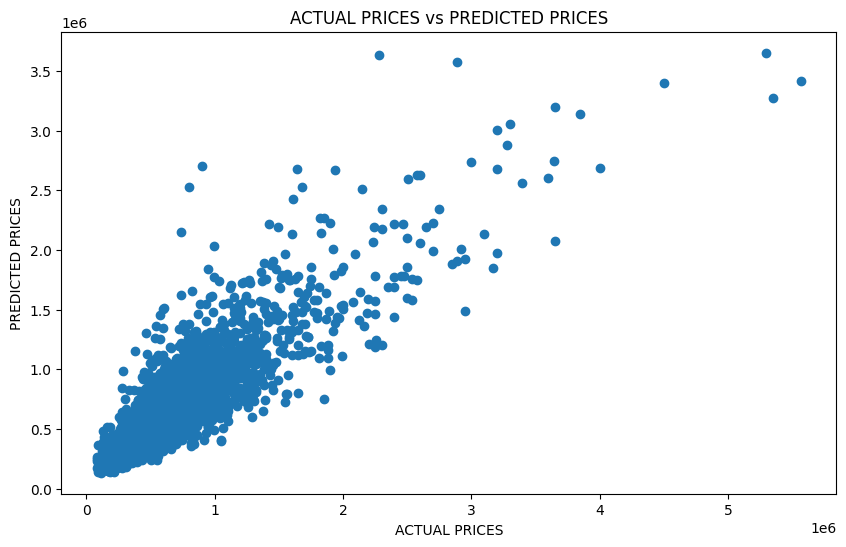

In [72]:
y_pred = model.predict(X_test)

plt.figure(figsize=(10,6))
plt.scatter(y_test,y_pred)
plt.xlabel('ACTUAL PRICES')
plt.ylabel('PREDICTED PRICES')
plt.title('ACTUAL PRICES vs PREDICTED PRICES')
plt.show()

In [73]:
from sklearn.metrics import r2_score

In [74]:
print(f'SCORE {r2_score(y_test,y_pred)}')

SCORE 0.7786686760014191


In [75]:
model.evaluate(X_test,y_test)

196/196 [==============================] - 0s 2ms/step - loss: 31922903040.0000 - mae: 108380.6484


[31922903040.0, 108380.6484375]

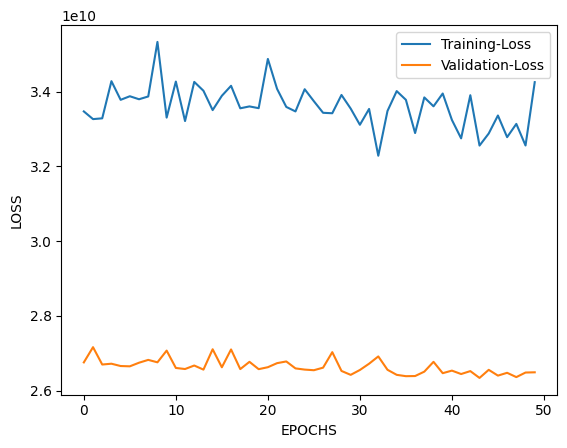

In [76]:
plt.plot(history.history['loss'] , label='Training-Loss')
plt.plot(history.history['val_loss'] , label='Validation-Loss')
plt.xlabel('EPOCHS')
plt.ylabel('LOSS')
plt.legend()
plt.show()

In [77]:
predictions = model.predict(X_test)

196/196 [==============================] - 0s 2ms/step


In [78]:
print(predictions[:5])

[[ 445516.8]
 [ 761826.9]
 [1352090.6]
 [2190735.8]
 [ 646665.5]]


In [79]:
comparison = pd.DataFrame({
    "Actual" : y_test ,
    "Predicted" : predictions.flatten()
    })

In [80]:
print(comparison.head())

          Actual     Predicted
735     365000.0  4.455168e+05
2830    865000.0  7.618269e+05
4106   1038000.0  1.352091e+06
16218  1490000.0  2.190736e+06
19964   711000.0  6.466655e+05


In [81]:
# Compare predictions with actual values and format them without scientific notation
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': predictions.flatten()})
comparison['Predicted'] = comparison['Predicted'].map(lambda x: '{:.2f}'.format(x))
comparison['Actual'] = comparison['Actual'].map(lambda x: '{:.2f}'.format(x))

# Print the first few rows of the comparison DataFrame
print(comparison.head())


           Actual   Predicted
735     365000.00   445516.81
2830    865000.00   761826.88
4106   1038000.00  1352090.62
16218  1490000.00  2190735.75
19964   711000.00   646665.50


In [82]:
import joblib

In [83]:
joblib.dump(model , 'ANNhousingpricepredictModel.joblib')

['ANNhousingpricepredictModel.joblib']